In [2]:
import pandas as pd
import numpy as np

import os
import sys

#data augmentation on sound
import keras
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

#used to play audio files
from IPython.display import Audio


# librosa is used to analyze audio.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt





import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [3]:
# Data Preparation process
Ravdess = "Project/ProjectS/audio actors/"
Crema = "Project/ProjectS/AudioWAV/"
Tess = "Project/ProjectS/TESS Toronto emotional speech set data/"
Savee = "Project/ProjectS/ALL/"

In [5]:
ravdess_directory_list = os.listdir(Ravdess)

emotionf = []

pathf = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        emotionf.append(int(part[2]))
        pathf.append(Ravdess + dir + '/' + file)
        
emotion_df = pd.DataFrame(emotionf, columns=['Emotions'])

path_df = pd.DataFrame(pathf, columns=['Path'])


Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,Project/ProjectS/audio actors/Actor_01/03-01-0...
1,neutral,Project/ProjectS/audio actors/Actor_01/03-01-0...
2,neutral,Project/ProjectS/audio actors/Actor_01/03-01-0...
3,neutral,Project/ProjectS/audio actors/Actor_01/03-01-0...
4,calm,Project/ProjectS/audio actors/Actor_01/03-01-0...


In [6]:
crema_directory_list = os.listdir(Crema)




emotionf = []

pathf = []

for file in crema_directory_list:
    pathf.append(Crema + file)
    
    part=file.split('_')
    
    
    if part[2] == 'SAD':
        emotionf.append('sad')
    elif part[2] == 'ANG':
        emotionf.append('angry')
    elif part[2] == 'DIS':
        emotionf.append('disgust')
    elif part[2] == 'FEA':
        emotionf.append('fear')
    elif part[2] == 'HAP':
        emotionf.append('happy')
    elif part[2] == 'NEU':
        emotionf.append('neutral')
    else:
        emotionf.append('Unknown')
        
emotion_df = pd.DataFrame(emotionf, columns=['Emotions'])

path_df = pd.DataFrame(pathf, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,Project/ProjectS/AudioWAV/1001_DFA_ANG_XX.wav
1,disgust,Project/ProjectS/AudioWAV/1001_DFA_DIS_XX.wav
2,fear,Project/ProjectS/AudioWAV/1001_DFA_FEA_XX.wav
3,happy,Project/ProjectS/AudioWAV/1001_DFA_HAP_XX.wav
4,neutral,Project/ProjectS/AudioWAV/1001_DFA_NEU_XX.wav


In [7]:
tess_directory_list = os.listdir(Tess)

emotionf = []


pathf = []




for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            emotionf.append('surprise')
            
        else:
            emotionf.append(part)
            
        pathf.append(Tess + dir + '/' + file)
        
emotion_df = pd.DataFrame(emotionf, columns=['Emotions'])

path_df = pd.DataFrame(pathf, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,Project/ProjectS/TESS Toronto emotional speech...
1,angry,Project/ProjectS/TESS Toronto emotional speech...
2,angry,Project/ProjectS/TESS Toronto emotional speech...
3,angry,Project/ProjectS/TESS Toronto emotional speech...
4,angry,Project/ProjectS/TESS Toronto emotional speech...


In [8]:
savee_directory_list = os.listdir(Savee)

emotionf = []
pathf = []

for file in savee_directory_list:
    pathf.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        emotionf.append('angry')
    elif ele=='d':
        emotionf.append('disgust')
    elif ele=='f':
        emotionf.append('fear')
    elif ele=='h':
        emotionf.append('happy')
    elif ele=='n':
        emotionf.append('neutral')
    elif ele=='sa':
        emotionf.append('sad')
    else:
        emotionf.append('surprise')
        
emotion_df = pd.DataFrame(emotionf, columns=['Emotions'])

path_df = pd.DataFrame(pathf, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,angry,Project/ProjectS/ALL/DC_a01.wav
1,angry,Project/ProjectS/ALL/DC_a02.wav
2,angry,Project/ProjectS/ALL/DC_a03.wav
3,angry,Project/ProjectS/ALL/DC_a04.wav
4,angry,Project/ProjectS/ALL/DC_a05.wav


In [9]:
# dataframe for all dataframes used so far
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,Project/ProjectS/audio actors/Actor_01/03-01-0...
1,neutral,Project/ProjectS/audio actors/Actor_01/03-01-0...
2,neutral,Project/ProjectS/audio actors/Actor_01/03-01-0...
3,neutral,Project/ProjectS/audio actors/Actor_01/03-01-0...
4,calm,Project/ProjectS/audio actors/Actor_01/03-01-0...


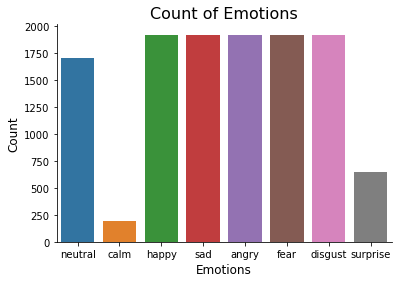

In [10]:
#Visualitzation

plt.title('Emotions total', size=15)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=10)
plt.xlabel('Emotions', size=10)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()


In [11]:
#waves and spectogram of different audio files

def waveplot(data, sr, e):
    plt.figure(figsize=(8, 2))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=13)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

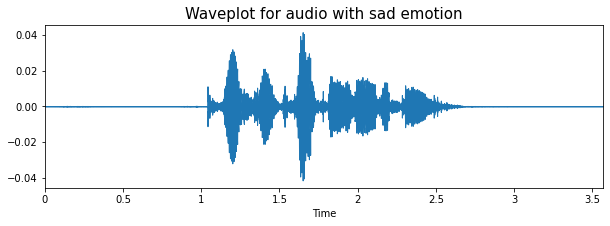

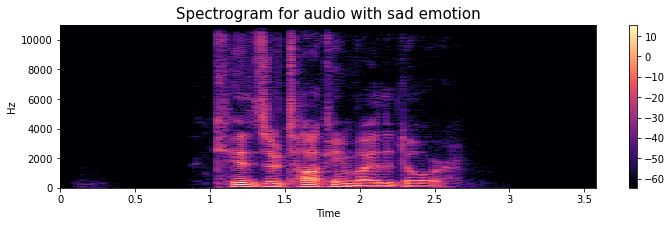

In [12]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, samplingr = librosa.load(path)
waveplot(data, samplingr, emotion)
spectrogram(data, samplingr, emotion)
Audio(path)



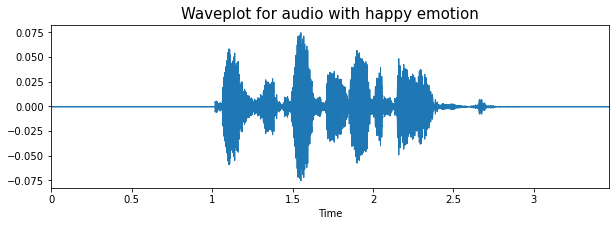

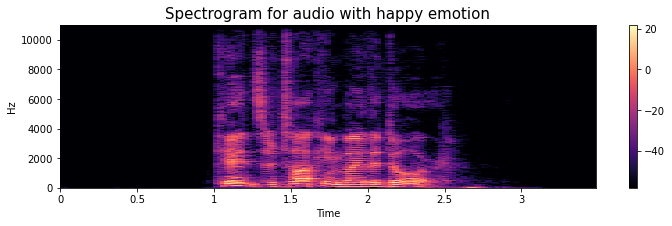

In [13]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, samplingr = librosa.load(path)
waveplot(data, samplingr, emotion)
spectrogram(data, samplingr, emotion)
Audio(path)

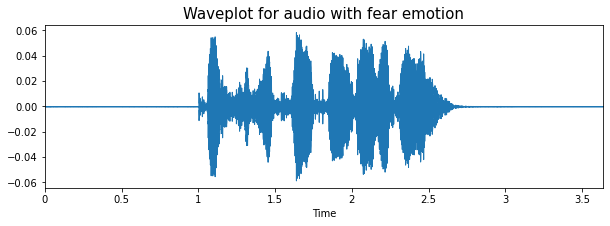

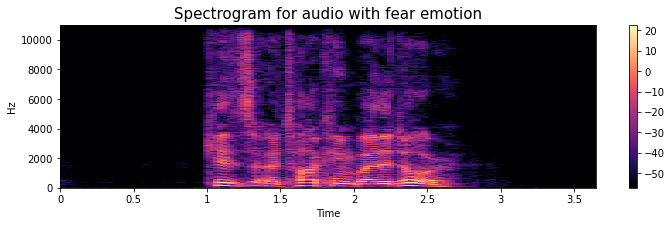

In [14]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, samplingr = librosa.load(path)
waveplot(data, samplingr, emotion)
spectrogram(data, samplingr, emotion)
Audio(path)

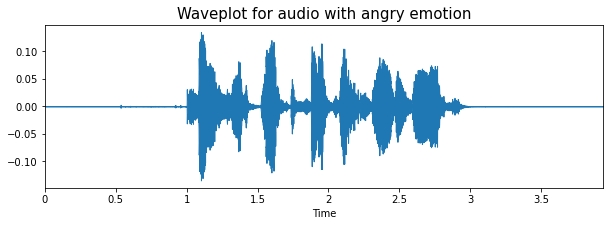

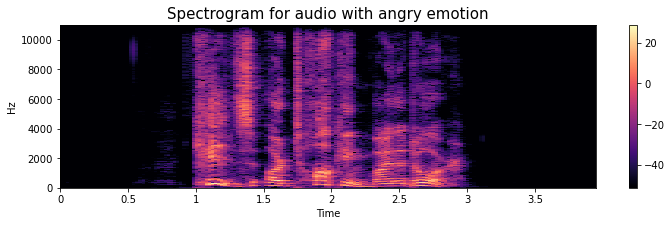

In [15]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, samplingr = librosa.load(path)
waveplot(data, samplingr, emotion)
spectrogram(data, samplingr, emotion)
Audio(path)

In [16]:
# augmentation process

def noise(data):
    noisea = 0.035*np.random.uniform()*np.amax(data)
    data = data + noisea*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, samplingr, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, samplingr, pitch_factor)

path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

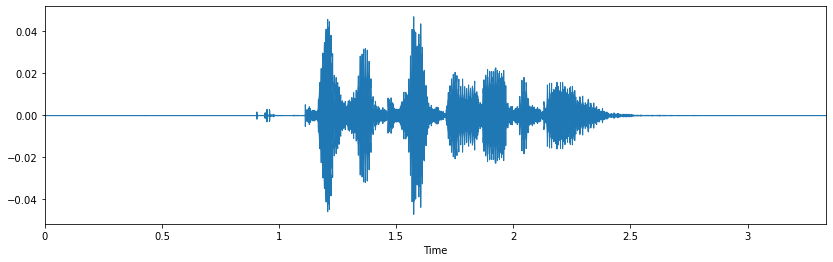

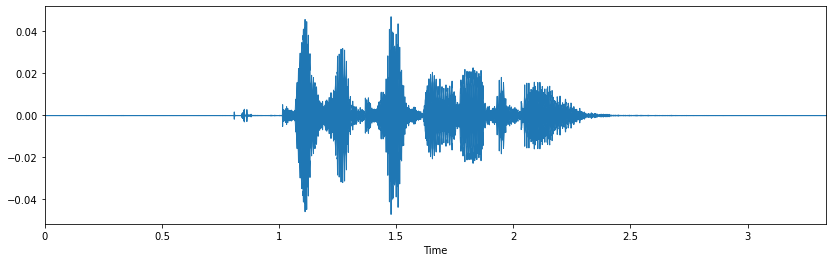

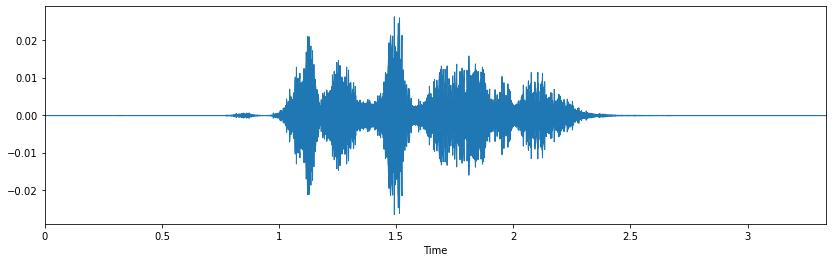

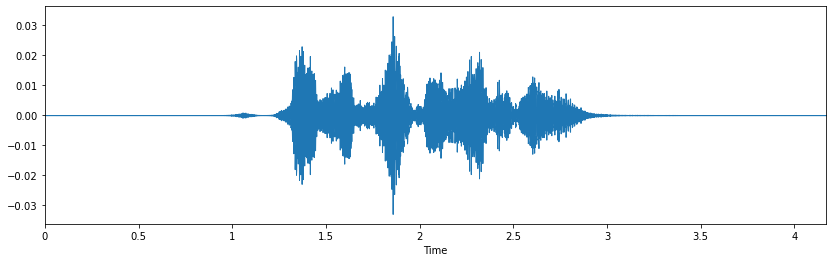

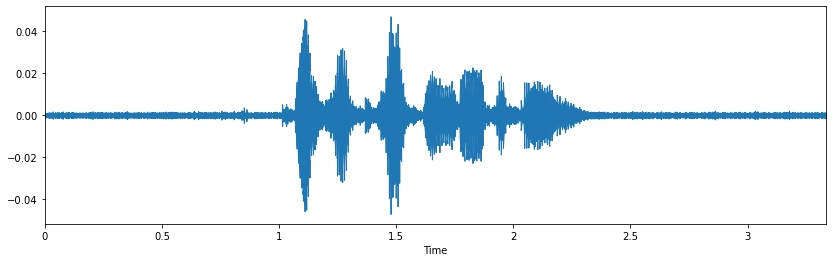

In [17]:
x = shift(data)


plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

x = pitch(data, sample_rate)



plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

x = stretch(data)



plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)


x = noise(data)



plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [18]:
#Feature Extract

def extractf(data):
    
    mfcctype = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcctype)) 
    
    
    meltype = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, meltype)) 
    
    
    result = np.array([])
    zcrtypetest = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcrtypetest)) 
  
    rmstype = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rmstype)) 

    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))
    
    return result

def getf(path):
    
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    res1 = extractf(data)
    result = np.array(res1)
    
    noise_data = noise(data)
    res2 = extractf(noise_data)
    result = np.vstack((result, res2)) 
    
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extractf(data_stretch_pitch)
    result = np.vstack((result, res3)) 
    
    return result
        

In [19]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = getf(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [20]:
len(X), len(Y), data_path.Path.shape

(36486, 36486, (12162,))

In [21]:
gFeatures = pd.DataFrame(X)
gFeatures['labels'] = Y
gFeatures.to_csv('features.csv', index=False)
gFeatures.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.300781,0.706492,0.756853,0.735217,0.731014,0.715156,0.667529,0.673754,0.722173,0.748969,...,4.319263e-06,0.000003,0.000002,2.286677e-06,5.131693e-06,8.065748e-06,0.000005,2.270858e-06,1.642365e-07,neutral
1,0.329215,0.774349,0.834742,0.830093,0.821483,0.826445,0.764938,0.668145,0.713054,0.755200,...,9.780806e-05,0.000098,0.000094,9.367226e-05,9.636900e-05,1.004833e-04,0.000102,1.001381e-04,9.177466e-05,neutral
2,0.176693,0.640605,0.712837,0.743736,0.714797,0.701402,0.694569,0.663853,0.688527,0.742508,...,7.999367e-07,0.000001,0.000001,5.350822e-07,3.480662e-07,8.398366e-07,0.000001,4.287777e-07,2.878995e-08,neutral
3,0.271272,0.674966,0.723259,0.724594,0.681302,0.670643,0.674574,0.630036,0.680146,0.708276,...,6.998011e-06,0.000007,0.000007,6.999257e-06,1.217880e-05,9.449916e-06,0.000008,2.638513e-06,1.788902e-07,neutral
4,0.339270,0.813808,0.842122,0.821019,0.809235,0.812969,0.726326,0.683944,0.738750,0.765161,...,1.848946e-04,0.000184,0.000179,1.988310e-04,2.045126e-04,2.055123e-04,0.000196,1.936937e-04,1.888473e-04,neutral


In [22]:


#splitting our data for training and testing.

X = gFeatures.iloc[: ,:-1].values
Y = gFeatures['labels'].values

encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()


x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


scaler = StandardScaler()


x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 8), (9122, 162, 1), (9122, 8))

In [23]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 162, 256)          1536      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 81, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 81, 256)           327936    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 41, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 41, 128)           163968    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 21, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 21, 128)           0

In [24]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
428/428 [==============================] - 65s 151ms/step - loss: 1.6918 - accuracy: 0.3151 - val_loss: 1.4671 - val_accuracy: 0.4171
Epoch 2/50
428/428 [==============================] - 64s 149ms/step - loss: 1.4338 - accuracy: 0.4238 - val_loss: 1.3473 - val_accuracy: 0.4597
Epoch 3/50
428/428 [==============================] - 65s 151ms/step - loss: 1.3477 - accuracy: 0.4584 - val_loss: 1.2661 - val_accuracy: 0.4877
Epoch 4/50
428/428 [==============================] - 64s 150ms/step - loss: 1.2879 - accuracy: 0.4864 - val_loss: 1.2307 - val_accuracy: 0.5019
Epoch 5/50
428/428 [==============================] - 64s 150ms/step - loss: 1.2541 - accuracy: 0.4973 - val_loss: 1.1828 - val_accuracy: 0.5218
Epoch 6/50
428/428 [==============================] - 64s 150ms/step - loss: 1.2228 - accuracy: 0.5086 - val_loss: 1.1908 - val_accuracy: 0.5039
Epoch 7/50
428/428 [==============================] - 64s 149ms/step - loss: 1.1915 - accuracy: 0.5263 - val_loss: 1.1510 - val_ac

286/286 [==============================] - 7s 22ms/step - loss: 1.1505 - accuracy: 0.6097
Accuracy of our model on test data :  60.97347140312195 %


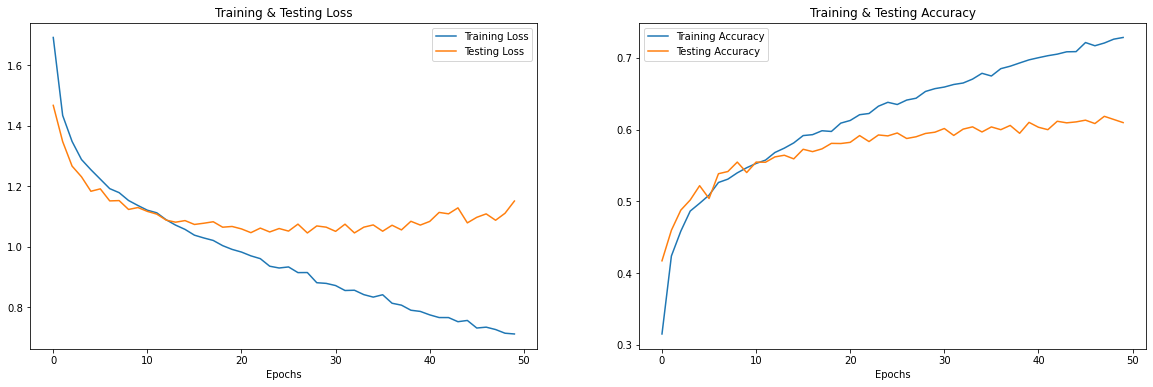

In [25]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [26]:
#predicting
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [27]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,disgust,disgust
1,disgust,disgust
2,angry,angry
3,disgust,disgust
4,sad,fear
5,sad,fear
6,sad,happy
7,happy,happy
8,disgust,sad
9,neutral,sad


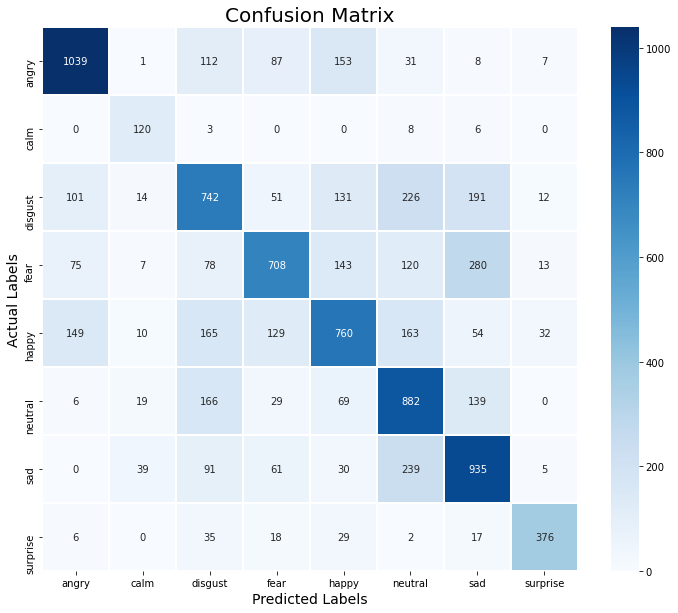

In [28]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.76      0.72      0.74      1438
        calm       0.57      0.88      0.69       137
     disgust       0.53      0.51      0.52      1468
        fear       0.65      0.50      0.56      1424
       happy       0.58      0.52      0.55      1462
     neutral       0.53      0.67      0.59      1310
         sad       0.57      0.67      0.62      1400
    surprise       0.84      0.78      0.81       483

    accuracy                           0.61      9122
   macro avg       0.63      0.66      0.64      9122
weighted avg       0.62      0.61      0.61      9122



In [30]:
#overall accuaracy. better results for angry and surprise emotions.